In [1]:
import os
import glob
import time
import pydub
import random
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import librosa.display
import tensorflow as tf
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

%matplotlib inline

# the point of this notebook is to create a dataset

In [12]:
# length of the files
classes = []
filenames = []
lengths = []
root = 'soundfiles'
for dr in os.listdir(root)[1:]:
    print('{} in progress...'.format(dr))
    cls = dr
    cwd = os.path.join(root, dr)
    files = os.listdir(cwd)[1:]
    for i in tqdm(range(len(files))):
        y, sr = librosa.load(os.path.join(cwd, files[i]))
#         f = sf.SoundFile(os.path.join(cwd, fil))
        length = librosa.get_duration(y)
        classes.append(cls)
        filenames.append(files[i])
        lengths.append(length)
    print('{} done'.format(dr))
print('all done')

file_lengths = pd.DataFrame({'class': classes, 'filename': filenames, 'length': lengths})
print(len(file_lengths))

  0%|          | 0/2042 [00:00<?, ?it/s]

beating in progress...


  0%|          | 0/1280 [00:00<?, ?it/s]

beating done
bleep in progress...


  0%|          | 0/1269 [00:00<?, ?it/s]

bleep done
chime in progress...


  0%|          | 0/1032 [00:00<?, ?it/s]

chime done
clapping in progress...


  0%|          | 2/5160 [00:00<05:33, 15.44it/s]

clapping done
click in progress...


  0%|          | 0/1072 [00:00<?, ?it/s]

click done
ding in progress...


  0%|          | 0/944 [00:00<?, ?it/s]

ding done
dripping in progress...


  0%|          | 1/1753 [00:00<03:14,  8.99it/s]

dripping done
pop in progress...


  0%|          | 0/1410 [00:00<?, ?it/s]

pop done
ringing in progress...


  0%|          | 0/2158 [00:00<?, ?it/s]

ringing done
thunder in progress...


100%|██████████| 2158/2158 [15:48:09<00:00, 34.93s/it]


thunder done
all done


NameError: name 'pd' is not defined

In [14]:
file_lengths = pd.DataFrame({'class': classes, 'filename': filenames, 'length': lengths})
print(len(file_lengths))

18120


In [15]:
file_lengths.head()

class                              filename     length
0  beating  "Hip" Beat, good for ambient.wav.mp3   1.920000
1  beating               001 - Beat Nick.mp3.mp3   2.013560
2  beating             00117 trzepanie 1.wav.mp3   7.000000
3  beating             00118 trzepanie 2.wav.mp3  11.177551
4  beating               00119 trzepak 3.wav.mp3   0.375828

In [16]:
file_lengths.to_json('file_lengths.json')

In [73]:
file_lengths = pd.read_json('file_lengths.json')

In [59]:
to_del = file_lengths.loc[file_lengths['length']>4]
print(len(to_del))


10340


In [46]:
try_file_lengths = file_lengths[file_lengths['length']<4.1]
print(len(try_file_lengths))

7860


In [47]:
try_file_lengths.groupby('class').describe()

length                                                              \
           count      mean       std       min       25%       50%       75%   
class                                                                          
beating    530.0  2.696072  1.136834  0.052834  1.846304  2.908549  3.840000   
bleep      824.0  1.670011  1.077509  0.017778  0.841519  1.565057  2.400000   
chime      312.0  1.941255  1.134291  0.127710  0.960862  1.797120  2.917188   
clapping   454.0  1.263516  1.209760  0.007166  0.349444  0.800000  1.853934   
click     3660.0  1.036086  0.938647  0.000635  0.301587  0.745760  1.544127   
ding       493.0  1.855665  1.139113  0.100000  0.907166  1.639002  2.917188   
dripping   217.0  1.347263  1.112368  0.033923  0.314558  1.180726  2.001995   
pop        988.0  1.125303  1.093156  0.001769  0.264478  0.723923  1.789456   
ringing    311.0  2.012886  1.012597  0.067664  1.189070  1.848435  2.893379   
thunder     71.0  2.293984  1.186735  0.030113  1.244059  2.541088  3.229932   

                    
               max  
class               
beating   4.068617  
bleep     4.092154  
chime     4.087710  
clapping  4.086712  
click     4.092154  
ding      4.088254  
dripping  4.036961  
pop       4.085170  
ringing   4.079501  
thunder   4.086122

In [49]:
np.median(sorted(try_file_lengths['length'], reverse=True))

1.094671201814059

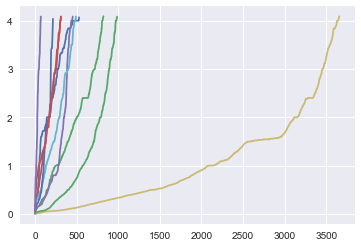

In [50]:
for i in sorted(set(classes)):
    plt.plot(sorted(try_file_lengths.loc[try_file_lengths['class']==i]['length']));

100%|██████████| 947/947 [15:29<00:00,  2.07s/it]


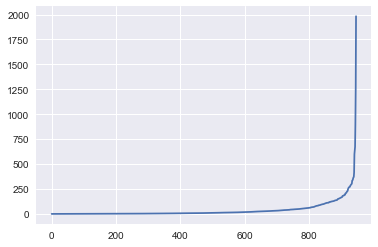

In [51]:
cwd = os.path.join('./soundfiles/creaking/')
files = os.listdir(cwd)[1:]
creaking_cls = []
creaking_filenames = []
creaking_lengths = []
cls = 'creaking'
for i in tqdm(range(len(files))):
    y, sr = librosa.load(os.path.join(cwd, files[i]))
#         f = sf.SoundFile(os.path.join(cwd, fil))
    length = librosa.get_duration(y)
    creaking_cls.append(cls)
    creaking_filenames.append(files[i])
    creaking_lengths.append(length)
creaking_file_lengths = pd.DataFrame({'class': creaking_cls, 'filename': creaking_filenames, 'length': creaking_lengths})
plt.plot(sorted(creaking_file_lengths['length']))

In [52]:
try_creaking_file_lengths = creaking_file_lengths[creaking_file_lengths['length']<4.1]
print(len(try_creaking_file_lengths))

322


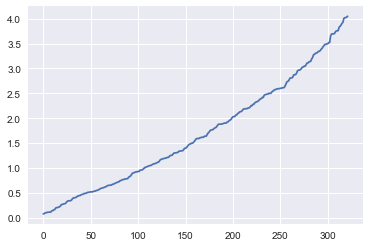

In [53]:
plt.plot(sorted(try_creaking_file_lengths['length']))

In [60]:
with open('soundcount_short.csv') as f:
    short_soundcount = list(map(lambda x: (x.split(';')[0], int(x.split(';')[1])), f.read().split('\n')[:-1]))
sorted(short_soundcount, key=lambda x: x[1], reverse=True)[:15]

[('noise', 7140),
 ('click', 3811),
 ('pop', 1023),
 ('bleep', 836),
 ('beating', 552),
 ('clapping', 536),
 ('ding', 514),
 ('slap', 467),
 ('beeping', 450),
 ('thud', 418),
 ('slam', 400),
 ('crashing', 387),
 ('scratching', 385),
 ('scraping', 340),
 ('squeaking', 339)]

100%|██████████| 884/884 [11:40<00:00,  1.26it/s]


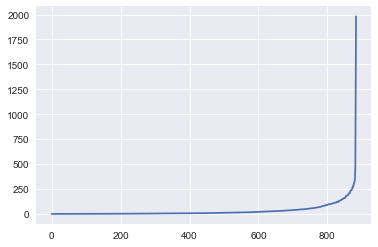

In [68]:
cwd = os.path.join('./soundfiles/squeaking/')
files = os.listdir(cwd)[1:]
squeaking_cls = []
squeaking_filenames = []
squeaking_lengths = []
cls = 'squeaking'
for i in tqdm(range(len(files))):
    y, sr = librosa.load(os.path.join(cwd, files[i]))
#         f = sf.SoundFile(os.path.join(cwd, fil))
    length = librosa.get_duration(y)
    squeaking_cls.append(cls)
    squeaking_filenames.append(files[i])
    squeaking_lengths.append(length)
squeaking_file_lengths = pd.DataFrame({'class': squeaking_cls, 'filename': squeaking_filenames, 'length': squeaking_lengths})
plt.plot(sorted(squeaking_file_lengths['length']))

In [74]:
all_files = pd.concat([file_lengths, creaking_file_lengths, squeaking_file_lengths])

In [80]:
all_files = all_files[all_files['class']!='chime']
all_files = all_files[all_files['class']!='thunder']
clss = sorted(set(all_files['class']))

In [103]:
clss = sorted(set(to_not_del['class']))[1:]+['scratching']
clss

['bleep',
 'clapping',
 'click',
 'creaking',
 'ding',
 'dripping',
 'pop',
 'ringing',
 'squeaking',
 'scratching']

100%|██████████| 849/849 [08:42<00:00,  9.35it/s]
335it [00:24, 11.64it/s]

all done


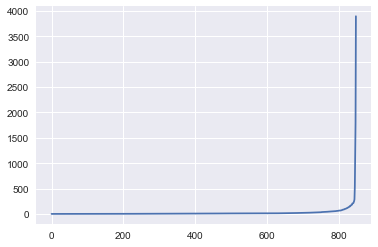

In [104]:
# добавляю scratching и всё с этим связанное
cwd = os.path.join('./soundfiles/scratching/')
files = os.listdir(cwd)[1:]
scr_cls = []
scr_filenames = []
scr_lengths = []
cls = 'scratching'
for i in tqdm(range(len(files))):
    y, sr = librosa.load(os.path.join(cwd, files[i]))
#         f = sf.SoundFile(os.path.join(cwd, fil))
    length = librosa.get_duration(y)
    scr_cls.append(cls)
    scr_filenames.append(files[i])
    scr_lengths.append(length)
scr_file_lengths = pd.DataFrame({'class': scr_cls, 'filename': scr_filenames, 'length': scr_lengths})
plt.plot(sorted(scr_file_lengths['length']));

scr_to_del = scr_file_lengths.loc[scr_file_lengths['length']>4]
scr_to_not_del = scr_file_lengths.loc[scr_file_lengths['length']<=4]

root = 'soundfiles'

if not os.path.exists(os.path.join(root, cls, 'shards_whole')):
    os.mkdir(os.path.join(root, cls, 'shards_whole'))
for row in tqdm(scr_to_not_del.loc[scr_to_not_del['class']==cls].itertuples()):
    track = pydub.AudioSegment.from_mp3(os.path.join(root, cls, row[2]))
    track.export(os.path.join(root, cls, 'shards_whole', row[2]))
print('all done')

In [105]:
# to_not_del = all_files.loc[all_files['length']<=4]
to_not_del = pd.concat([to_not_del, scr_to_not_del])

In [255]:
# просто перетаскиваю целые файлы в другую папку
root = 'soundfiles'
for i in range(len(clss)):
    print(clss[i])
    if os.path.exists(os.path.join(root, clss[i], 'shards_whole')):
        os.system('rm -r "{}"'.format(os.path.join(root, clss[i], 'shards_whole')))
    if not os.path.exists(os.path.join(root, clss[i], 'shards_whole')):
        os.mkdir(os.path.join(root, clss[i], 'shards_whole'))
    for row in tqdm(to_not_del.loc[to_not_del['class']==clss[i]].itertuples()):
        frm = os.path.join(root, clss[i], row[2])
        name = '{}-{}-{}'.format(row[2][:-4], i, row[2][-4:])
        to = os.path.join(root, clss[i], 'shards_whole', name)
        os.system('cp "{}" "{}"'.format(frm, to))
#         track = pydub.AudioSegment.from_mp3(os.path.join(root, cls, row[2]))
#         track.export(os.path.join(root, cls, 'shards_whole', row[2]))
print('all done')

20it [00:00, 191.91it/s]

bleep


812it [00:04, 196.37it/s]
14it [00:00, 133.29it/s]

clapping


446it [00:02, 180.58it/s]
17it [00:00, 162.97it/s]

click


3645it [00:17, 203.87it/s]
23it [00:00, 226.04it/s]

creaking


317it [00:01, 224.86it/s]
14it [00:00, 130.96it/s]

ding


486it [00:02, 207.40it/s]
24it [00:00, 236.75it/s]

dripping


215it [00:00, 231.11it/s]
22it [00:00, 216.58it/s]

pop


974it [00:04, 218.59it/s]
23it [00:00, 224.77it/s]

ringing


306it [00:01, 238.20it/s]
23it [00:00, 214.40it/s]

squeaking


306it [00:01, 239.68it/s]
24it [00:00, 233.24it/s]

scratching


335it [00:01, 234.91it/s]

all done


In [240]:
to_del.groupby('class').describe()

length                                                          \
             count        mean         std       min        25%        50%   
class                                                                        
beating     1524.0   38.686521  113.643672  4.000045   7.500000  12.310317   
bleep        468.0   31.591431   66.289536  4.007029   6.772370  13.354830   
clapping     586.0   44.093859  133.370987  4.008345   8.134456  13.572630   
click       1515.0   37.716091  132.727727  4.007302   7.370658  13.630113   
creaking     630.0   57.995892  123.955027  4.005442   8.892063  23.000839   
ding         586.0   31.843713   69.991319  4.000363   7.166508  12.700612   
dripping     729.0  160.337060  525.961377  4.034014  18.655692  42.000000   
pop          779.0   47.561911  198.669744  4.000045   8.312744  16.000000   
ringing     1104.0   42.267410  330.043206  4.018141   7.979592  12.850794   
scratching   514.0   39.468866  198.865740  4.063537   8.460737  10.159546   
squeaking    578.0   48.836648  112.384366  4.013107   8.071939  19.857166   

                                     
                  75%           max  
class                                
beating     27.598900   1804.253560  
bleep       27.428617    763.653515  
clapping    24.984354   1697.497914  
click       31.427075   3897.261497  
creaking    57.151984   1982.556372  
ding        26.375000    763.000000  
dripping    96.000000   9438.312018  
pop         34.693651   4623.338957  
ringing     30.672812  10819.867211  
scratching  24.604705   3897.261497  
squeaking   50.168787   1982.556372

In [241]:
clss

['bleep',
 'clapping',
 'click',
 'creaking',
 'ding',
 'dripping',
 'pop',
 'ringing',
 'squeaking',
 'scratching']

In [242]:
# to_del = all_files.loc[all_files['length']>4]
to_del = pd.concat([to_del, scr_to_del])
root = 'soundfiles'
for cls in clss:
    print(cls)
    if not os.path.exists(os.path.join(root, cls, 'shards')):
        os.mkdir(os.path.join(root, cls, 'shards'))
    for row in tqdm(to_del.loc[to_del['class']==cls].itertuples()):
        track = pydub.AudioSegment.from_mp3(os.path.join(root, cls, row[2]))
        for i in range(int(row[3])//6):
            if i<6:
                track[6000*i:6000*i+4000].export(os.path.join(root, cls, 'shards', '''{}_shard_{}.mp3'''.format(row[2][:-4], i)))
print('all done')

0it [00:00, ?it/s]

bleep


468it [02:21,  3.23it/s]
1it [00:00,  7.15it/s]

clapping


586it [03:10,  4.30it/s]
0it [00:00, ?it/s]

click


1515it [07:47,  2.92it/s]
0it [00:00, ?it/s]

creaking


630it [04:25,  1.44it/s]
0it [00:00, ?it/s]

ding


586it [02:40,  5.28it/s]
0it [00:00, ?it/s]

dripping


729it [08:50,  1.68it/s]
0it [00:00, ?it/s]

pop


779it [04:26,  3.43it/s]
0it [00:00, ?it/s]

ringing


1104it [05:48,  2.74it/s]
0it [00:00, ?it/s]

squeaking


578it [03:50,  4.22it/s]
1it [00:00,  8.54it/s]

scratching


1028it [04:50,  9.32it/s]

all done


# NOW HERE

In [243]:
whole_total = []
for cls in clss:
    whole_total.append(sum(to_not_del.loc[to_not_del['class']==cls]['length']))
shards_total = []
for cls in clss:
    shards_total.append((len(os.listdir(os.path.join(root, cls, 'shards')))-1)*4)
summed_duration = pd.DataFrame({'class': clss, 'nonshards': whole_total, 'shards': shards_total})
summed_duration

class    nonshards  shards
0       bleep  1327.437234    4484
1    clapping   541.307619    5628
2       click  3731.265170   15712
3    creaking   525.085306    8552
4        ding   886.517370    5560
5    dripping   284.285034   12896
6         pop  1055.320408    8848
7     ringing   605.792109   11464
8   squeaking   555.815918    7424
9  scratching   584.929796    4652

In [244]:
summed_duration['total'] = summed_duration['nonshards']+summed_duration['shards']
summed_duration

class    nonshards  shards         total
0       bleep  1327.437234    4484   5811.437234
1    clapping   541.307619    5628   6169.307619
2       click  3731.265170   15712  19443.265170
3    creaking   525.085306    8552   9077.085306
4        ding   886.517370    5560   6446.517370
5    dripping   284.285034   12896  13180.285034
6         pop  1055.320408    8848   9903.320408
7     ringing   605.792109   11464  12069.792109
8   squeaking   555.815918    7424   7979.815918
9  scratching   584.929796    4652   5236.929796

In [247]:
summed_duration['num_sh_to_del'] = summed_duration['total'].map(lambda x: (x-5236)/4)
summed_duration

class    nonshards  shards         total  num_sh_to_del
0       bleep  1327.437234    4484   5811.437234     143.859308
1    clapping   541.307619    5628   6169.307619     233.326905
2       click  3731.265170   15712  19443.265170    3551.816293
3    creaking   525.085306    8552   9077.085306     960.271327
4        ding   886.517370    5560   6446.517370     302.629342
5    dripping   284.285034   12896  13180.285034    1986.071259
6         pop  1055.320408    8848   9903.320408    1166.830102
7     ringing   605.792109   11464  12069.792109    1708.448027
8   squeaking   555.815918    7424   7979.815918     685.953980
9  scratching   584.929796    4652   5236.929796       0.232449

In [257]:
# выравниваем длительность классов
root = 'soundfiles'
for row in summed_duration.itertuples():
    print(row[1])
    files = os.listdir(os.path.join(root, row[1], 'shards'))[1:]
    to_stay = random.sample(files, len(files)-int(row[5]))
    for i in tqdm(range(len(to_stay))):
        frm = os.path.join(root, row[1], 'shards', to_stay[i])
        name = '{}-{}-{}'.format(to_stay[i][:-4], clss.index(row[1]), to_stay[i][-4:])
        to = os.path.join(root, row[1], 'shards_whole', name)
        os.system('cp "{}" "{}"'.format(frm, to))
#         track = pydub.AudioSegment.from_mp3(os.path.join(root, row[1], 'shards', to_stay[i]))
#         track.export(os.path.join(root, row[1], 'shards_whole', to_stay[i]))
print('all done')

  2%|▏         | 20/978 [00:00<00:04, 199.98it/s]

bleep


  1%|▏         | 15/1174 [00:00<00:08, 144.85it/s]

clapping


  5%|▌         | 19/377 [00:00<00:01, 183.58it/s]

click


  2%|▏         | 20/1178 [00:00<00:06, 192.66it/s]

creaking


  2%|▏         | 20/1088 [00:00<00:05, 195.96it/s]

ding


  2%|▏         | 19/1238 [00:00<00:06, 186.82it/s]

dripping


  2%|▏         | 16/1046 [00:00<00:06, 157.08it/s]

pop


  2%|▏         | 18/1158 [00:00<00:06, 179.27it/s]

ringing


  2%|▏         | 20/1171 [00:00<00:05, 195.50it/s]

squeaking


  2%|▏         | 20/1163 [00:00<00:05, 196.58it/s]

scratching


100%|██████████| 1163/1163 [00:05<00:00, 212.49it/s]

all done


In [258]:
# посчитать сколько всего файлов
# выдать их полную длину (по таблице, должно быть ~10*10000сек = ~27,8 часов)
# записать в текст

paths = [os.path.join('soundfiles', cls, 'shards_whole') for cls in clss]

filenames = []
classes = []
for cls in clss:
    fils = os.listdir(os.path.join('soundfiles', cls, 'shards_whole'))[1:]
    filenames += fils
    classes += [cls]*len(fils)
files = pd.DataFrame({'class': classes, 'filename': filenames}) 

len(files)

18360

In [259]:
files.head()

class                                 filename
0  bleep    04619 wrong password beeps.wav-0-.mp3
1  bleep  06416 scifi code access ding.wav-0-.mp3
2  bleep       06744 martian code ding.wav-0-.mp3
3  bleep                             1.wav-0-.mp3
4  bleep   11bleep_increas_vel.wav_shard_0-0-.mp3

In [260]:
files['long_file_YN'] = files['filename'].map(lambda x: x[:-12]+x[-4:] if x[:-8].endswith('_shard_') else 'none')

In [261]:
files.head()

class                                 filename  \
0  bleep    04619 wrong password beeps.wav-0-.mp3   
1  bleep  06416 scifi code access ding.wav-0-.mp3   
2  bleep       06744 martian code ding.wav-0-.mp3   
3  bleep                             1.wav-0-.mp3   
4  bleep   11bleep_increas_vel.wav_shard_0-0-.mp3   

                     long_file_YN  
0                            none  
1                            none  
2                            none  
3                            none  
4  11bleep_increas_vel.wav_sh.mp3

In [262]:
# print(len(set(files['long_file'])))
print(len(files[files['long_file_YN']!='none']))
len(files['filename'])

10525


18360

In [48]:
def get_train_test_inds(y, lf, train_proportion=0.7):
    '''Generates indices, making random stratified split into training set and testing sets
    with proportions train_proportion and (1-train_proportion) of initial sample.
    y is any iterable indicating classes of each observation in the sample.
    Initial proportions of classes inside training and 
    testing sets are preserved (stratified sampling).
    '''

    y = np.array(y)
    lf = np.array(lf)
    train_inds = np.zeros(len(y), dtype=bool)
    test_inds = np.zeros(len(y), dtype=bool)
    values = np.unique(y)
    for value in values:
        # берёт список всех индексов где нужный класс
        value_inds = np.nonzero(y==value)[0]
        print('Total of cls: {}'.format(len(value_inds)))
        print(len(lf[value_inds]))
        # шаффлит список
        np.random.shuffle(value_inds)
        n = int(train_proportion*len(value_inds))
        
        tr_values = []
        test_values = []
        tuda_zhe = []
        nn = int(n*0.1)
        
        while len(tr_values) < n*0.98:
        # считает сколько индексов нужно взять для трейна
            if len(tr_values) == 0:
                tr_values = value_inds[:nn]
                print('Needed in train: {}'.format(n))
            else:
                n_end = nn + int(n*0.05)
                tr_values = np.concatenate([tr_values, np.setdiff1d(value_inds[nn:n_end], tr_values)])
                nn += int(n*0.05)
            for fil in lf[tr_values]:
                if fil!='none':
                    augm = np.nonzero(lf[value_inds]==fil)[0]
                    tuda_zhe = np.concatenate([tuda_zhe, augm])
#             tuda_zhe = np.concatenate([np.nonzero(lf[value_inds]==fil)[0] for fil in lf[tr_values] if fil!='none'])
                    print(len(np.setdiff1d(tuda_zhe, value_inds)))
            tr_values = np.concatenate([tr_values, np.setdiff1d(tuda_zhe, tr_values)])
            
        print('Eventually: {}'.format(len(tr_values)))
        test_values = np.setdiff1d(value_inds, tr_values)
        print('Test values: {}'.format(len(test_values)))
        print(len(np.setdiff1d(tuda_zhe, value_inds)))

        # берёт из шаффленого списка столько индексов трэйна сколько нужно
#         train_inds[value_inds[:n]]=True
#         # всё остальное на тест
#         test_inds[value_inds[n:]]=True
        train_inds[tr_values] = True
        test_inds[test_values] = True

    return train_inds, test_inds

In [292]:
y = files['class']
train_inds, test_inds = get_train_test_inds(y, files['long_file_YN'], train_proportion=0.8)
# print(y[train_inds])
# print(y[test_inds])

In [264]:
train = files[train_inds]
test = files[test_inds]

In [10]:
train = pd.read_csv('files_train_list.csv', index_col='Unnamed: 0')

In [12]:
test = pd.read_csv('files_test_list.csv', index_col='Unnamed: 0')

In [265]:
files.to_csv('files_list.csv')

In [266]:
train.to_csv('files_train_list.csv')

In [270]:
test['fold'] = ['test']*len(test)
# test.sort(columns=['filename', 'class']).to_csv('files_test_list.csv')
test.sort_values(['filename', 'class']).to_csv('files_test_list.csv')

/Users/Basilis/anaconda3/envs/diplom3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
print(len(train))

13890


In [13]:
test[20:24]

class                                      filename long_file_YN  fold
3451  click      02_Hat_Heavy_Cymbals_&_Snares.wav-2-.mp3         none  test
3454  click  02_Hat_OpenClose_Cymbals_&_Snares.wav-2-.mp3         none  test
3463  click       02a_Hat_Med_Cymbals_&_Snares.wav-2-.mp3         none  test
3464  click      02a_Hat_Open_Cymbals_&_Snares.wav-2-.mp3         none  test

In [11]:
train[30:35]

class                                    filename  \
33  bleep  334483_Transformation_1.wav_shard_2-0-.mp3   
34  bleep  334483_Transformation_1.wav_shard_4-0-.mp3   
35  bleep  334483_Transformation_1.wav_shard_5-0-.mp3   
36  bleep  334483_Transformation_2.wav_shard_1-0-.mp3   
37  bleep  334483_Transformation_2.wav_shard_2-0-.mp3   

                          long_file_YN  
33  334483_Transformation_1.wav_sh.mp3  
34  334483_Transformation_1.wav_sh.mp3  
35  334483_Transformation_1.wav_sh.mp3  
36  334483_Transformation_2.wav_sh.mp3  
37  334483_Transformation_2.wav_sh.mp3

In [272]:
os.mkdir('dataset/test')
for row in test.itertuples():
#     path = os.path.join('dataset/test', row[1])
    path = os.path.join('dataset', 'test')
#     if not os.path.exists(path):
#         os.mkdir(path)
    frm = os.path.join('soundfiles', row[1], 'shards_whole', row[2])
    to = os.path.join(path, row[2])
    os.system('cp "{}" "{}"'.format(frm, to))

In [ ]:
folds15_ind, folds610_ind = get_train_test_inds(train['class'], train['long_file_YN'], train_proportion=0.5)
folds15, folds610 = train[folds15_ind], train[folds610_ind]
len(folds15)+len(folds610)

In [16]:
folds15.head()

class                        filename            long_file_YN
5   bleep     130_BEEP.wav_shard_0-0-.mp3     130_BEEP.wav_sh.mp3
6   bleep     130_BEEP.wav_shard_1-0-.mp3     130_BEEP.wav_sh.mp3
13  bleep  1kHz (1 minute)_shard_1-0-.mp3  1kHz (1 minute)_sh.mp3
14  bleep  1kHz (1 minute)_shard_2-0-.mp3  1kHz (1 minute)_sh.mp3
15  bleep  1kHz (1 minute)_shard_3-0-.mp3  1kHz (1 minute)_sh.mp3

In [17]:
# folds 1 to 5
fold1_ind, folds25_ind = get_train_test_inds(folds15['class'], folds15['long_file_YN'], train_proportion=0.2)
fold1, folds25 = folds15[fold1_ind], folds15[folds25_ind]
## folds 2 to 5
folds23_ind, folds45_ind = get_train_test_inds(folds25['class'], folds25['long_file_YN'], train_proportion=0.5)
folds23, folds45 = folds25[folds23_ind], folds25[folds45_ind]
## folds 2 to 3
fold2_ind, fold3_ind = get_train_test_inds(folds23['class'], folds23['long_file_YN'], train_proportion=0.5)
fold2, fold3 = folds23[fold2_ind], folds23[fold3_ind]
## folds 4 to 5
fold4_ind, fold5_ind = get_train_test_inds(folds45['class'], folds45['long_file_YN'], train_proportion=0.5)
fold4, fold5 = folds45[fold4_ind], folds45[fold5_ind]

# folds 6 to 10
fold6_ind, folds710_ind = get_train_test_inds(folds610['class'], folds610['long_file_YN'], train_proportion=0.2)
fold6, folds710 = folds610[fold6_ind], folds610[folds710_ind]
## folds 7 to 10
folds78_ind, folds910_ind = get_train_test_inds(folds710['class'], folds710['long_file_YN'], train_proportion=0.5)
folds78, folds910 = folds710[folds78_ind], folds710[folds910_ind]
## folds 7 to 8
fold7_ind, fold8_ind = get_train_test_inds(folds78['class'], folds78['long_file_YN'], train_proportion=0.5)
fold7, fold8 = folds78[fold7_ind], folds78[fold8_ind]
## folds 9 to 10
fold9_ind, fold10_ind = get_train_test_inds(folds910['class'], folds910['long_file_YN'], train_proportion=0.5)
fold9, fold10 = folds910[fold9_ind], folds910[fold10_ind]

In [54]:
fold8.tail()

class                                       filename  \
18330  scratching  writing - pencil - wide 01.wav_shard_0-9-.mp3   
18331  scratching  writing - pencil - wide 01.wav_shard_1-9-.mp3   
18333  scratching  writing - pencil - wide 03.wav_shard_0-9-.mp3   
18336  scratching        writing - sharpie 01.wav_shard_0-9-.mp3   
18337  scratching        writing - sharpie 01.wav_shard_1-9-.mp3   

                                long_file_YN fold  
18330  writing - pencil - wide 01.wav_sh.mp3    8  
18331  writing - pencil - wide 01.wav_sh.mp3    8  
18333  writing - pencil - wide 03.wav_sh.mp3    8  
18336        writing - sharpie 01.wav_sh.mp3    8  
18337        writing - sharpie 01.wav_sh.mp3    8

In [19]:
def move_train_fold(fold, foldname):
    path = os.path.join('dataset', 'train', foldname)
    print(foldname)
    if not os.path.exists(path):
        os.mkdir(path)
    for row in tqdm(fold.itertuples()):
        frm = os.path.join('soundfiles', row[1], 'shards_whole', row[2])
        to = os.path.join(path, row[2])
        os.system('cp "{}" "{}"'.format(frm, to))

In [20]:
# os.mkdir('dataset/train')
for i in range(1, 11):
    name = 'fold{}'.format(i)
    print(len(vars()[name]))
    vars()[name]['fold'] = ['{}'.format(i)]*len(vars()[name])
    move_train_fold(vars()[name], name)
train = pd.concat([vars()['fold{}'.format(i)] for i in range(1, 11)])
train.sort_values(['fold', 'filename']).to_csv('files_train_list.csv')

/Users/Basilis/anaconda3/envs/diplom3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
12it [00:00, 118.14it/s]

1363
fold1


1363it [00:07, 185.83it/s]
19it [00:00, 185.53it/s]

1363
fold2


1363it [00:06, 206.71it/s]
18it [00:00, 177.72it/s]

1496
fold3


1496it [00:08, 181.72it/s]
17it [00:00, 165.65it/s]

1469
fold4


1469it [00:08, 164.74it/s]
16it [00:00, 154.85it/s]

1505
fold5


1505it [00:08, 186.72it/s]
13it [00:00, 128.80it/s]

1465
fold6


1465it [00:07, 200.68it/s]
20it [00:00, 199.63it/s]

1462
fold7


1462it [00:07, 197.13it/s]
23it [00:00, 223.04it/s]

1526
fold8


1526it [00:07, 198.57it/s]
22it [00:00, 208.38it/s]

1459
fold9


1459it [00:08, 181.84it/s]


KeyError: 'fold1'

In [21]:
train.tail()

class                            filename  \
18349  scratching              Writing_shard_5-9-.mp3   
18353  scratching  Xmas Wrapping16.wav_shard_0-9-.mp3   
18354  scratching  Xmas Wrapping18.wav_shard_0-9-.mp3   
18355  scratching           Xmas Wrapping2.wav-9-.mp3   
18356  scratching  Xmas Wrapping22.wav_shard_0-9-.mp3   

                     long_file_YN  
18349              Writing_sh.mp3  
18353  Xmas Wrapping16.wav_sh.mp3  
18354  Xmas Wrapping18.wav_sh.mp3  
18355                        none  
18356  Xmas Wrapping22.wav_sh.mp3

In [25]:
trrrain = []
for i in range(1, 11):
    name = 'fold{}'.format(i)
    print(name)
    print(len(vars()[name]))
    if i==1:
        trrrain = vars()[name]
    else:
        trrrain = pd.concat([trrrain, vars()[name]])
len(trrrain)

fold1
1363
fold2
1363
fold3
1496
fold4
1469
fold5
1505
fold6
1465
fold7
1462
fold8
1526
fold9
1459
fold10
1509


14617

In [ ]:
trrrain.sort_values(['fold', 'filename']).to_csv('dataset/files_train_list.csv')